# Sommaire:  
* [1. Data preprocessing ](#1)  
  * [1.1. Gérer les Nan](#1.1) 
  * [1.2. Standardiser les variables quantitatives](#1.2)
  * [1.3. Train-set/ test-set](#1.3) 
* [2. Machine Learning](#2) 
  * [2.1. Les métriques d'évaluation](#2.1) 
  * [2.2. Entrainer les modèles](#2.2) 
    * [a) Regression linéaire multivariée ](#a)
    * [b) Modèle ElasticNet](#b)
    * [c) Modèle SVR](#c) 
  * [2.3. Entrainer les modèles non linéaires](#2.3)
    * [a) Modèle RandomForestRegressor ](#2.3.a)
    * [b) Modèle XGBoost (eXtreme Gradient Boosting) ](#2.3.b)
* [3. Choix des deux modèles les plus performants](#3)  
  * [3.1.  Modèle de prédiction des émissions de CO2 (TotalGHGEmissions)](#3.1)
    * [a) Evaluation selon le coefficient de détermination (r2) ](#3.a)
    * [b) Evaluation selon MAE ](#3.b)
    * [c) Evaluation selon le temps d'entrainement ](#3.c) 
    * [d) Choix du modèle final](#3.d) 
  * [3.2. Modèle de prédiction des consommations d'énergie (SiteEnergyUse(kBtu)) ](#3.2)
    * [a) Evaluation selon le coefficient de détermination (r2) ](#3.2.a)
    * [b) Evaluation selon MAE ](#3.2.b)
    * [c) Evaluation selon le temps d'entrainement ](#3.2.c) 
    * [d) Choix du modèle final](#3.2.d) 
* [4. Feature Importance](#4) 
  * [4.1. Par rapport au modèle RandomForestRegressor ](#4.1) 
  * [4.2. Par rapport au modèle GradientBoostingRegressor ](#4.2)
* [5. Mesurer l'effet de Energy Star Score](#5)

In [1]:
import pandas as pd
import my_module

In [2]:
dataset = pd.read_csv('cleanData.csv')
dataset.head()

,Unnamed: 0,ENERGYSTARScore,TotalGHGEmissions,BuildingType,SiteEnergyUse(kBtu),PrimaryPropertyType,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,NumberofFloors,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,nbre_TotalUseType,Building_age,dist_cityHall,zip
0,0,62.5,2.397427,1.0,6.851497,8,659000030,7,3.0,12.0,...,8,88434.0,1,NaN,1,NaN,1,89,1.002638,98101.0
1,1,56.0,2.446669,1.0,6.922782,8,659000220,7,3.0,11.0,...,8,83880.0,1,15064.0,3,4622.0,3,20,0.952870,98101.0
2,2,30.5,3.317098,1.0,7.862482,8,659000475,7,3.0,41.0,...,8,756868.0,1,100000.0,1,0.0,1,47,1.165271,98101.0
3,3,28.5,3.045865,1.0,7.243335,8,659000640,7,3.0,10.0,...,8,61320.0,1,NaN,1,NaN,1,90,1.129636,98101.0
4,4,71.0,2.704455,1.0,7.161394,8,659000970,7,3.0,18.0,...,8,123445.0,1,68009.0,7,0.0,3,36,1.253359,98121.0


# 1. Data preprocessing  <a class="anchor" id="1"></a>  


In [3]:
my_module.variable_survey(dataset)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Unnamed: 0,int64,1584,0.0 %
1,ENERGYSTARScore,float64,193,33.52 %
2,TotalGHGEmissions,float64,1560,0.0 %
3,BuildingType,float64,4,0.0 %
4,SiteEnergyUse(kBtu),float64,1584,0.0 %
5,PrimaryPropertyType,int64,9,0.0 %
6,TaxParcelIdentificationNumber,int64,1504,0.0 %
7,CouncilDistrictCode,int64,7,0.0 %
8,Neighborhood,float64,13,0.0 %
9,NumberofFloors,float64,44,0.0 %


#### Remarques:  
1. Nous remarquons que les deux variables 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' contiennent un pourcentage assez élevé de nan. Nous pensons qu'un tel taux de valeurs manquantes ne servira pas beaucoup dans la prédiction des variables target. Nous décidons donc de les supprimer.  
- Pour la variables 'LargestPropertyUseTypeGFA', nous allons imputer les nans par la moyenne.  

2. Nous remarquons aussi qu'il y a des variables qui sont plutot des étiquettes identifiants les batiments plutot que des mesures numériques qui peuvent être utiles pour la prédiction (zip,CouncilDistrictCode, TaxParcelIdentificationNumber). Nous allons donc les supprimer.  


## 1.1. Gérer les Nan <a class="anchor" id="1.1"></a>  

In [4]:
dataset = dataset.drop(['ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',\
              'zip','CouncilDistrictCode','TaxParcelIdentificationNumber'], axis=1)

In [5]:
dataset['LargestPropertyUseTypeGFA'] = dataset['LargestPropertyUseTypeGFA'].fillna(dataset['LargestPropertyUseTypeGFA'].mean())


## 1.2. Standardiser les variables quantitatives <a class="anchor" id="1.2"></a>  

In [6]:
dataset.columns

Index(['Unnamed: 0', 'ENERGYSTARScore', 'TotalGHGEmissions', 'BuildingType',
       'SiteEnergyUse(kBtu)', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'nbre_TotalUseType', 'Building_age',
       'dist_cityHall'],
      dtype='object')

In [7]:
varsToStandardize = ['PropertyGFATotal', 'PropertyGFAParking', \
                     'PropertyGFABuilding', 'LargestPropertyUseTypeGFA',\
                     'nbre_TotalUseType','NumberofFloors', 'Building_age',\
                     'dist_cityHall','ENERGYSTARScore']

In [8]:
from sklearn.preprocessing import StandardScaler

#nous choisissons le standardisateur le plus basique
scaler = StandardScaler()
#standardiser uniquement les variables quantitatives
dataset[varsToStandardize] = scaler.fit_transform(dataset[varsToStandardize])

In [9]:
dataset

,Unnamed: 0,ENERGYSTARScore,TotalGHGEmissions,BuildingType,SiteEnergyUse(kBtu),PrimaryPropertyType,Neighborhood,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,nbre_TotalUseType,Building_age,dist_cityHall
0,0,-0.022781,2.397427,1.0,6.851497,8,3.0,1.167863,0.365833,-0.321390,-0.059850,8,-0.039907,1,1,-0.763548,1.033337,-0.961885
1,1,-0.250908,2.446669,1.0,6.922782,8,3.0,1.017722,0.528391,0.019324,-0.059615,8,-0.055956,1,3,0.887592,-1.061395,-0.976022
2,2,-1.145869,3.317098,1.0,7.862482,8,3.0,5.521971,2.819009,1.903273,2.611549,8,2.315773,1,1,-0.763548,-0.241718,-0.915688
3,3,-1.216062,3.045865,1.0,7.243335,8,3.0,0.867580,-0.010991,-0.321390,-0.153643,8,-0.135461,1,1,-0.763548,1.063695,-0.925811
4,4,0.275539,2.704455,1.0,7.161394,8,3.0,2.068713,0.893957,0.520670,0.016498,8,0.083478,1,7,0.887592,-0.575660,-0.890666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,3427,-0.601873,1.320977,2.0,5.929289,2,5.0,-0.483695,-1.664832,-0.321390,-0.323235,2,-0.308238,1,1,-0.763548,-0.879245,0.010380
1580,3428,NaN,1.507451,2.0,5.977850,2,3.0,-0.483695,-1.393674,-0.321390,-0.310415,7,-0.295177,1,1,-0.763548,-1.304263,-0.931073
1581,3429,NaN,2.349355,2.0,6.760867,2,7.0,-0.483695,-1.595012,-0.321390,-0.320249,7,-0.324840,10,7,0.887592,-0.393510,-0.089893
1582,3430,NaN,1.344589,2.0,5.857013,6,5.0,-0.483695,-1.523700,-0.321390,-0.316984,7,-0.328301,10,4,2.538732,-0.848886,1.180054


## 1. 3. Train-set/ test-set <a class="anchor" id="1.3"></a>  


In [10]:
dataset.columns

Index(['Unnamed: 0', 'ENERGYSTARScore', 'TotalGHGEmissions', 'BuildingType',
       'SiteEnergyUse(kBtu)', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'nbre_TotalUseType', 'Building_age',
       'dist_cityHall'],
      dtype='object')

In [11]:
#liste des variables à entrainer
vars_to_train = ['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'nbre_TotalUseType',
 'Building_age',
 'dist_cityHall']

In [12]:
#liste des variables à predire
vars_to_predict = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

In [13]:
#separation features x et target y
X = dataset[vars_to_train]
Y = dataset[vars_to_predict]

In [14]:
Y.shape


(1584, 2)

In [15]:
X.shape

(1584, 14)

In [16]:
# sparer jeux de données traitement et jeux de données test
#controler/fixer l'aléatoire servant à mélanger le dataset avant de la composer en train set et test set (random_state=10))

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X , Y , train_size=0.8, random_state=10)

# 2. Machine Learning <a class="anchor" id="2"></a>  

## 2.1. Les métriques d'évaluation <a class="anchor" id="2.1"></a>  

**Discussion des métriques** 
Pour évaluer le modèle de regression linéaire il faut surtout calculer l'erreur entre les prédictions et les valeurs du dataset. Nous allons donc utiliser la métrique:  
- RMSE: Root Mean Squared Error --> calcule la racine de la moyenne des valeurs absolues des erreurs (racine carré de l'erreur quadratique moyenne): elle  permet de remettre l'erreur quadratique moyennne (MSE) à son échelle. Cette métrique pénalise beaucoup plus les grandes erreurs que la MAE (Mean Absobute Error). Donc ce n'est pas très utile si on a des outliers. On pourra donc juger négativement un modèle dont les erreurs sont provoquées par les outliers.   

conclusion:  
- si on a des outliers et qu'on veut les évaluer--> MAE (Mean Absolute Error)
- S'il n'y a pas des outliers --> RMSE
- si il y a des outliers mais qu'on ne veut pas les évaluer --> MAE ( Median Absolute Error)  

**Choix final des métriques:**
1) Puisque j'ai déjà fait le passage au log des mes données numériques à entrainer et que leurs distributions suivent bien des distributions normales, alors je suppose que mes données ne contiennent pas des outliers et que s'ils existent, je vais pas les évaluer. Je choisi donc la métrique MAE.   
2)  La deuxième métrique que je vais utilisée est le coefficient de détermination R2: permet d'évaluer la performance du modèle par rapport à la variance des données. L'idéal c'est quand les erreurs commises par le modèle sont beaucoup plus petites que la variance présente dans les données --> R2 proche de 1.  
3) La troisième métrique sera le temps d'exécution du modèle. 


In [17]:
#definir un dictionnaire des metriques d'evaluation
scoring = {"MAE" : "neg_median_absolute_error",
           "r2" : "r2"}

## 2.2. Entrainer les modèles linéaires <a class="anchor" id="2.2"></a>  

## a) Regression linéaire multivariée <a class="anchor" id="a"></a>  

- Je vais utiliser le cross-validation pour entrainer puis valider les modèles sur plusieurs coupes possible de train-set (en utilisant la technique kfold).  
- Je vais utiliser le GridSearchCV afin de trouver les valeurs optimales des hyperparamètres des algorithmes de regression linéaire.  
- Afin d'automatiser le processus, Nous allons définir une fonction pour automatiser l'évaluation de tout les modèles sélectionnés.

In [18]:
#création du dataframe où on va sauvegarder tout les résultats
column_names = ["modele", "variable", "best_params", "best_R2", "MAE", "training_time",\
                "score", "best_estimator"]
resultDf = pd.DataFrame(columns = column_names)
resultDf

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator


In [19]:
#importer le modele de regression lineaire
from sklearn.linear_model import LinearRegression
#from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import median_absolute_error
import time
model = LinearRegression()

#definir un dictionnaire des hyperparamètres
param_lmv = {"fit_intercept": [True, False],
             "normalize": [True, False],
             }



def trainModel (model, hyper_param, resultDf):
    vars_to_predict = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']
    for var in vars_to_predict:
        grid = GridSearchCV ( model, 
                          hyper_param, 
                          cv= 5, 
                          scoring= scoring,
                          refit= 'r2',
                          return_train_score = True
                   )
        start_time = time.time()
       
        #entrainer la grid qui contient plusieurs estimateurs
        grid.fit(x_train, y_train[var])
        
        training_time = time.time() - start_time
        df = pd.DataFrame(grid.cv_results_)
    
        #récupérer les valeurs des métriques d'évaluation
        MAE = round(df['mean_test_MAE'][df['rank_test_MAE'] == 1].values[0] , 3)
        R2 = round (grid.best_score_ , 3)
        bestParams = grid.best_params_
    
        #sauvegarder les résultats dans un un dataframe
        newRow = {'modele': model, 
              'variable': var, 'best_params': bestParams,
              'best_R2':R2 , 'MAE':MAE,
              'best_estimator': grid.best_estimator_,
              'score': grid.best_estimator_.score(x_test, y_test[var]),
              'training_time' : training_time}
        resultDf = resultDf.append(newRow, ignore_index = True)
        
    return resultDf


In [20]:
resultDf = trainModel(LinearRegression(), param_lmv, resultDf)
resultDf 

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)


In [21]:
grid = GridSearchCV(LinearRegression(), 
                    param_lmv, 
                    cv= 5, 
                    scoring= scoring,
                    refit= 'r2',
                    return_train_score = True
                   )
v= %time grid.fit(x_train, y_train['TotalGHGEmissions'])

CPU times: user 351 ms, sys: 4.44 ms, total: 356 ms
Wall time: 179 ms


In [22]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(grid.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
0,0.003587,0.000438,0.002990,0.000482,True,True,"{'fit_intercept': True, 'normalize': True}",-0.360183,-0.305287,-0.318921,-0.357490,-0.344174,-0.337211,0.021638,1,-0.330569,-0.344857,-0.345443,-0.330983,-0.335272,-0.337425,0.006522,0.366435,0.383692,0.478134,0.390948,0.338434,0.391529,0.046928,1,0.417474,0.412980,0.388972,0.413857,0.425229,0.411703,0.012159
1,0.003376,0.000192,0.002399,0.000120,True,False,"{'fit_intercept': True, 'normalize': False}",-0.360183,-0.305287,-0.318921,-0.357490,-0.344174,-0.337211,0.021638,2,-0.330569,-0.344857,-0.345443,-0.330983,-0.335272,-0.337425,0.006522,0.366435,0.383692,0.478134,0.390948,0.338434,0.391529,0.046928,2,0.417474,0.412980,0.388972,0.413857,0.425229,0.411703,0.012159
2,0.003003,0.000172,0.002279,0.000022,False,True,"{'fit_intercept': False, 'normalize': True}",-0.415972,-0.345107,-0.350755,-0.362803,-0.348711,-0.364670,0.026330,3,-0.348246,-0.357634,-0.346985,-0.348930,-0.356273,-0.351614,0.004425,0.180137,0.089095,0.293069,0.133411,0.269738,0.193090,0.077994,3,0.235593,0.253396,0.208975,0.249948,0.215232,0.232629,0.017901
3,0.002908,0.000048,0.002308,0.000046,False,False,"{'fit_intercept': False, 'normalize': False}",-0.415972,-0.345107,-0.350755,-0.362803,-0.348711,-0.364670,0.026330,3,-0.348246,-0.357634,-0.346985,-0.348930,-0.356273,-0.351614,0.004425,0.180137,0.089095,0.293069,0.133411,0.269738,0.193090,0.077994,3,0.235593,0.253396,0.208975,0.249948,0.215232,0.232629,0.017901


## b) Modèle ElasticNet <a class="anchor" id="b"></a>  

In [23]:
resultDf

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)


In [24]:
from sklearn.linear_model import ElasticNet
import numpy as np

param_eNet = {"max_iter": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}

resultDf = trainModel(ElasticNet(), param_eNet, resultDf)


/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.3495680460295, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.796354304814, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.0321199065782, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.13547300350207, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.33860278351541, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.31207557786328, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.40163196107677, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124.49353742265885, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.43628024986037, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.20746996618107, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.86387022454873, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.55857521088186, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.69277611904498, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.16039312383548, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.14341189731294, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.09738736885643, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.7711108782899, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.86177796720204, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.86392723324653, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.62418637776523, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.18749744805393, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.70045985464208, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.3557083985376, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.49067525986159, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.46528836388079, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.035390968725125, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.0610145865609, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.676655568805046, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.582003603080892, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.30425177697239, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.16855684177904, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.16406173345055, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.96169798520265, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39484376567418167, tolerance: 0.04328937802188889
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.43704178223683, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.04288455226306, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.52183163164204, tolerance: 0.04395651484780018
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.95080671291296, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.16336190491322, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.22430446206332, tolerance: 0.045082736986827264
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224.35446220627895, tolerance: 0.04526725364958203
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.3790900521583, tolerance: 0.04281619264700462
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.52326964795234, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.365757311956486, tolerance: 0.03372239468350249
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.0786346860549, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.15792858430835, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.99004843678906, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.69595494659204, tolerance: 0.03372239468350249
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.903758224383964, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.468136090152846, tolerance: 0.03372239468350249
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.75554996597049, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.31022619520847, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.5559938204259, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.10490997745208, tolerance: 0.03372239468350249
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.85533381906436, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.200185697816885, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.90299416308814, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.98318524435528, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.54483647932696, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.34651207040916, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.72025338797195, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.99539991008366, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.68191456220302, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.6835380084587, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.40267727693278, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.79027492300484, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coo

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80.76192661808025, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.89572336772177, tolerance: 0.03372239468350249
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.06035261468962, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coor

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.24262524460691, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.25125891547756, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.45784795289997, tolerance: 0.03277729149841602
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.41395836749828, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.4605133191711, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.594764540685496, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_co

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.61454251819723, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.37551093223351, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.59870644467863, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.443754916485, tolerance: 0.0352295851143714
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.69119567922704, tolerance: 0.03338082403727135
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158.30039673487357, tolerance: 0.032067006159921356
  model = cd_fast.enet_coordinate_descent(
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

In [25]:
resultDf

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)
2,ElasticNet(),TotalGHGEmissions,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",0.390,-0.327,9.036120,0.442850,"ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=5)"
3,ElasticNet(),SiteEnergyUse(kBtu),"{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter':...",0.601,-0.191,8.645677,0.638269,"ElasticNet(alpha=0.0001, l1_ratio=0.0, max_ite..."


## c) Modèle SVR <a class="anchor" id="c"></a>  

In [26]:
from sklearn.svm import LinearSVR

param_svr = {'C' : [0.001, 0.01, 0.1, 1, 10],
             'epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'max_iter': [10, 100, 1000]}

resultDf = trainModel(LinearSVR(), param_svr, resultDf)

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed t

/home/soumaya/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
resultDf

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)
2,ElasticNet(),TotalGHGEmissions,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",0.390,-0.327,9.036120,0.442850,"ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=5)"
3,ElasticNet(),SiteEnergyUse(kBtu),"{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter':...",0.601,-0.191,8.645677,0.638269,"ElasticNet(alpha=0.0001, l1_ratio=0.0, max_ite..."
4,LinearSVR(),TotalGHGEmissions,"{'C': 1, 'epsilon': 0.1, 'loss': 'squared_epsi...",0.390,-0.322,14.545080,0.436976,"LinearSVR(C=1, epsilon=0.1, loss='squared_epsi..."
5,LinearSVR(),SiteEnergyUse(kBtu),"{'C': 1, 'epsilon': 0, 'loss': 'squared_epsilo...",0.601,-0.193,14.476995,0.639257,"LinearSVR(C=1, epsilon=0, loss='squared_epsilo..."


## 2.3. Entrainer les modèles non linéaires <a class="anchor" id="2.3"></a>  

### a) Modèle RandomForestRegressor <a class="anchor" id="2.3.a"></a>  

In [28]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'max_features' : ['sqrt', 'log2'],
             'max_depth': [5, 15, 25, 50],
             'min_samples_split': [2, 5, 10],
             'bootstrap' : [True, False],
             'min_samples_leaf': [1,2,5,10]}

resultDf = trainModel(RandomForestRegressor(), param_rfr, resultDf)

In [29]:
resultDf

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)
2,ElasticNet(),TotalGHGEmissions,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",0.390,-0.327,9.036120,0.442850,"ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=5)"
3,ElasticNet(),SiteEnergyUse(kBtu),"{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter':...",0.601,-0.191,8.645677,0.638269,"ElasticNet(alpha=0.0001, l1_ratio=0.0, max_ite..."
4,LinearSVR(),TotalGHGEmissions,"{'C': 1, 'epsilon': 0.1, 'loss': 'squared_epsi...",0.390,-0.322,14.545080,0.436976,"LinearSVR(C=1, epsilon=0.1, loss='squared_epsi..."
5,LinearSVR(),SiteEnergyUse(kBtu),"{'C': 1, 'epsilon': 0, 'loss': 'squared_epsilo...",0.601,-0.193,14.476995,0.639257,"LinearSVR(C=1, epsilon=0, loss='squared_epsilo..."
6,RandomForestRegressor(),TotalGHGEmissions,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.486,-0.284,213.423159,0.522512,"(DecisionTreeRegressor(max_depth=50, max_featu..."
7,RandomForestRegressor(),SiteEnergyUse(kBtu),"{'bootstrap': True, 'max_depth': 25, 'max_feat...",0.672,-0.177,210.024641,0.677787,"(DecisionTreeRegressor(max_depth=25, max_featu..."


### b) Modèle XGBoost (eXtreme Gradient Boosting) <a class="anchor" id="2.3.b"></a>  

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

param_XGB = {'learning_rate': [0.01,0.02,0.03,0.04],
             'n_estimators' : [100,500,1000, 1500],
             'max_depth'    : [4]
                 }

resultDf = trainModel(GradientBoostingRegressor(), param_XGB, resultDf)

In [31]:
resultDf

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)
2,ElasticNet(),TotalGHGEmissions,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",0.390,-0.327,9.036120,0.442850,"ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=5)"
3,ElasticNet(),SiteEnergyUse(kBtu),"{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter':...",0.601,-0.191,8.645677,0.638269,"ElasticNet(alpha=0.0001, l1_ratio=0.0, max_ite..."
4,LinearSVR(),TotalGHGEmissions,"{'C': 1, 'epsilon': 0.1, 'loss': 'squared_epsi...",0.390,-0.322,14.545080,0.436976,"LinearSVR(C=1, epsilon=0.1, loss='squared_epsi..."
5,LinearSVR(),SiteEnergyUse(kBtu),"{'C': 1, 'epsilon': 0, 'loss': 'squared_epsilo...",0.601,-0.193,14.476995,0.639257,"LinearSVR(C=1, epsilon=0, loss='squared_epsilo..."
6,RandomForestRegressor(),TotalGHGEmissions,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.486,-0.284,213.423159,0.522512,"(DecisionTreeRegressor(max_depth=50, max_featu..."
7,RandomForestRegressor(),SiteEnergyUse(kBtu),"{'bootstrap': True, 'max_depth': 25, 'max_feat...",0.672,-0.177,210.024641,0.677787,"(DecisionTreeRegressor(max_depth=25, max_featu..."
8,GradientBoostingRegressor(),TotalGHGEmissions,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.496,-0.298,175.645128,0.528822,([DecisionTreeRegressor(criterion='friedman_ms...
9,GradientBoostingRegressor(),SiteEnergyUse(kBtu),"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.682,-0.177,174.992610,0.710741,([DecisionTreeRegressor(criterion='friedman_ms...


## 3. Choix des deux modèles les plus performants <a class="anchor" id="3"></a>  
Nous allons visulaiser les performance des modèles pour l'entrainement et le test de la variables TotalGHGEmissions et la variable SiteEnergyUse(kBtu)   

### 3.1.  Modèle de prédiction des émissions de CO2 (TotalGHGEmissions) <a class="anchor" id="3.1"></a>  

In [32]:
#Dataframe de comparaison des modèles de prédiction de TotalGHGEmissions
dfTotalGHGEmissions = resultDf[resultDf['variable']=='TotalGHGEmissions']
dfTotalGHGEmissions

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
0,LinearRegression(),TotalGHGEmissions,"{'fit_intercept': True, 'normalize': True}",0.392,-0.337,0.263857,0.427675,LinearRegression(normalize=True)
2,ElasticNet(),TotalGHGEmissions,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",0.390,-0.327,9.036120,0.442850,"ElasticNet(alpha=0.01, l1_ratio=0.9, max_iter=5)"
4,LinearSVR(),TotalGHGEmissions,"{'C': 1, 'epsilon': 0.1, 'loss': 'squared_epsi...",0.390,-0.322,14.545080,0.436976,"LinearSVR(C=1, epsilon=0.1, loss='squared_epsi..."
6,RandomForestRegressor(),TotalGHGEmissions,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.486,-0.284,213.423159,0.522512,"(DecisionTreeRegressor(max_depth=50, max_featu..."
8,GradientBoostingRegressor(),TotalGHGEmissions,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.496,-0.298,175.645128,0.528822,([DecisionTreeRegressor(criterion='friedman_ms...


### a) Evaluation selon le coefficient de détermination (r2) <a class="anchor" id="3.a"></a>  

<AxesSubplot:xlabel='modele'>

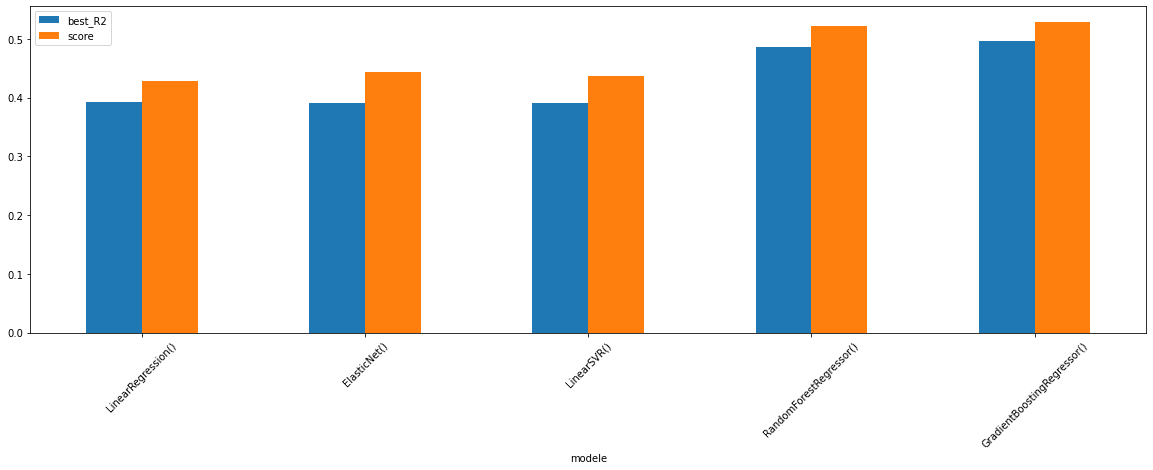

In [33]:
import matplotlib as plt
#visualiser la comparaison entre le coefficient de determination r2 sur le train-set (orange) et sur le test-set (bleu)  
dfTotalGHGEmissions.plot(kind='bar',x='modele', y=['best_R2','score'], stacked=False,rot=45,figsize=(20,6))


### Interprétation:  
- Nous remarquons déjà que les modèles qui ont un bon/faible score sur le train-test, on respectivement de bon/faible score sur le test-set.  Le faible écart entre ces deux score prouve qu'il n'y a pas un problème d'overfitting signalé. 
- Nous constatons que le coefficient de détermination est plus élevé (> 0.5) pour les modèles ensemblistes (RandomForest et GradientBoosting). Pour LinearSVR, ElasticNet et LinearRegression , ce score est presque le même.  
   
   --> En conclusion, le meilleur modèle selon r2 est RandomForestRegressor(). 

### b) Evaluation selon MAE  <a class="anchor" id="3.b"></a>  
Puisque dans sklearn, la métrique définit est negative_median_absolute_error, alors l'interpretation doit être faite à l'inverse. Autrement dit nous espérons le maximiser. Et donc, le modèle ayant le negative_median_absolute_error le plus élevé, est jugé le meilleur. Afin de simplifier la visualisation, nous allons afficher la valeur absolue de MAE.

<ipython-input-34-cf248835bb61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTotalGHGEmissions['MAE']=np.abs(dfTotalGHGEmissions['MAE'])


<AxesSubplot:xlabel='modele'>

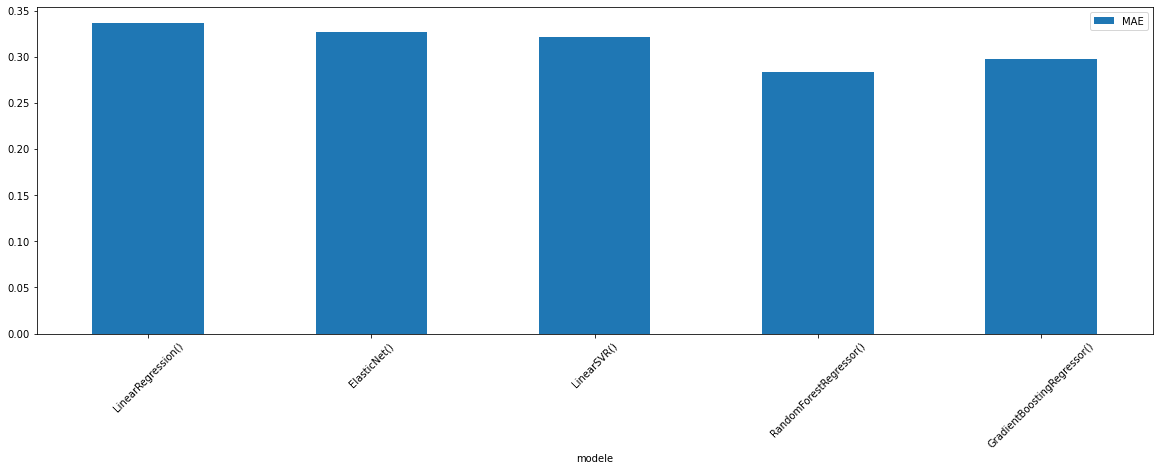

In [34]:
dfTotalGHGEmissions['MAE']=np.abs(dfTotalGHGEmissions['MAE'])
dfTotalGHGEmissions.plot(kind='bar',x='modele', y='MAE', stacked=False,rot=45,figsize=(20,6))

### Interprétation :  
- Le modèle le plus performant est celui qui minimise MAE. Donc, le modèle le plus performant est RandomForest(MAE= 0.283), et le moins performant est LinearRegressor (MAE= 0.337). 

### c) Evaluation selon le temps d'entrainement <a class="anchor" id="3.c"></a>  

<AxesSubplot:xlabel='modele'>

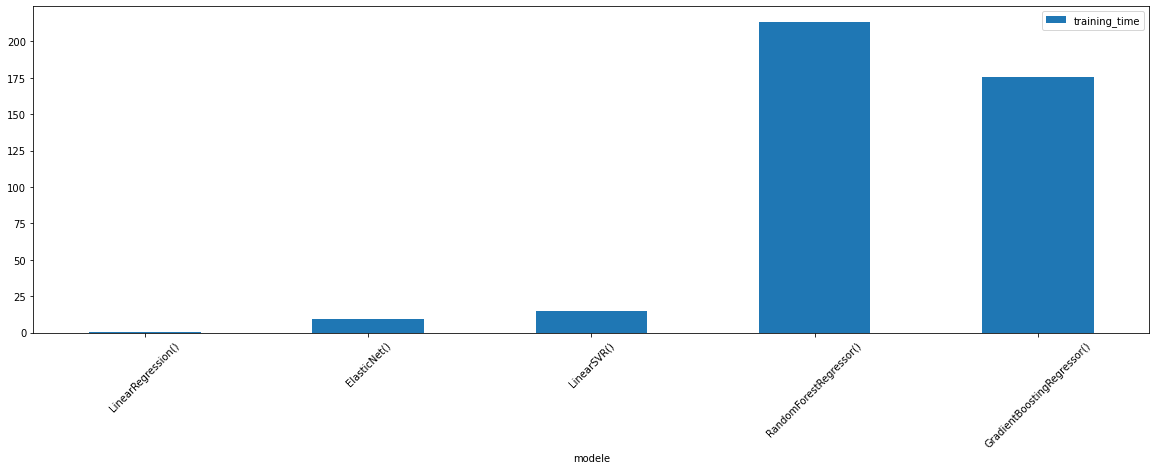

In [35]:
dfTotalGHGEmissions.plot(kind='bar',x='modele', y='training_time', rot=45,figsize=(20,6))

### Interprétation:  
Nous remarquons que RandomForest est très couteux et consomme beaucoup de temps pour entrainer le modèle (presque 3 minutes et demi). Je pense que c'est beaucoup pour un modèle de machine learning. Pareil pour GradientBoosting avec un temps d'entrainement légèrement moins faible (presque 3 minute).  
- Pour les autres modèles, ils font preuve d'un faible temps d'entrainement. Le plus rapide c'est LinearRegressor(). 

### d) Choix du modèle final : <a class="anchor" id="3.d"></a>  

Pour faire mon choix, je vais me baser sur les deux métriques d'évaluation R2 et MAE. On ne donnera pas une importance au temps d'entrainement. Autrement dit, on suppose que pour nous le plus important c'est de trouver des résultat correctes, peu importe le temps mis pour ça.  Par conséquent, nous choisissons le modèle RandomForesRegressor. 

## 3.2. Modèle de prédiction des consommations d'énergie (SiteEnergyUse(kBtu)) <a class="anchor" id="3.2"></a>  

In [36]:
#Dataframe de comparaison des modèles de prédiction de TotalGHGEmissions
dfEnergyUse = resultDf[resultDf['variable']=='SiteEnergyUse(kBtu)']
dfEnergyUse

,modele,variable,best_params,best_R2,MAE,training_time,score,best_estimator
1,LinearRegression(),SiteEnergyUse(kBtu),"{'fit_intercept': True, 'normalize': True}",0.603,-0.197,0.172474,0.639965,LinearRegression(normalize=True)
3,ElasticNet(),SiteEnergyUse(kBtu),"{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter':...",0.601,-0.191,8.645677,0.638269,"ElasticNet(alpha=0.0001, l1_ratio=0.0, max_ite..."
5,LinearSVR(),SiteEnergyUse(kBtu),"{'C': 1, 'epsilon': 0, 'loss': 'squared_epsilo...",0.601,-0.193,14.476995,0.639257,"LinearSVR(C=1, epsilon=0, loss='squared_epsilo..."
7,RandomForestRegressor(),SiteEnergyUse(kBtu),"{'bootstrap': True, 'max_depth': 25, 'max_feat...",0.672,-0.177,210.024641,0.677787,"(DecisionTreeRegressor(max_depth=25, max_featu..."
9,GradientBoostingRegressor(),SiteEnergyUse(kBtu),"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.682,-0.177,174.992610,0.710741,([DecisionTreeRegressor(criterion='friedman_ms...


### a) Evaluation selon le coefficient de détermination (r2)  <a class="anchor" id="3.2.a"></a>  
Tou d'abord nous allons écarter le modèle Lasso parce que son best_R2 est négatif


<AxesSubplot:xlabel='modele'>

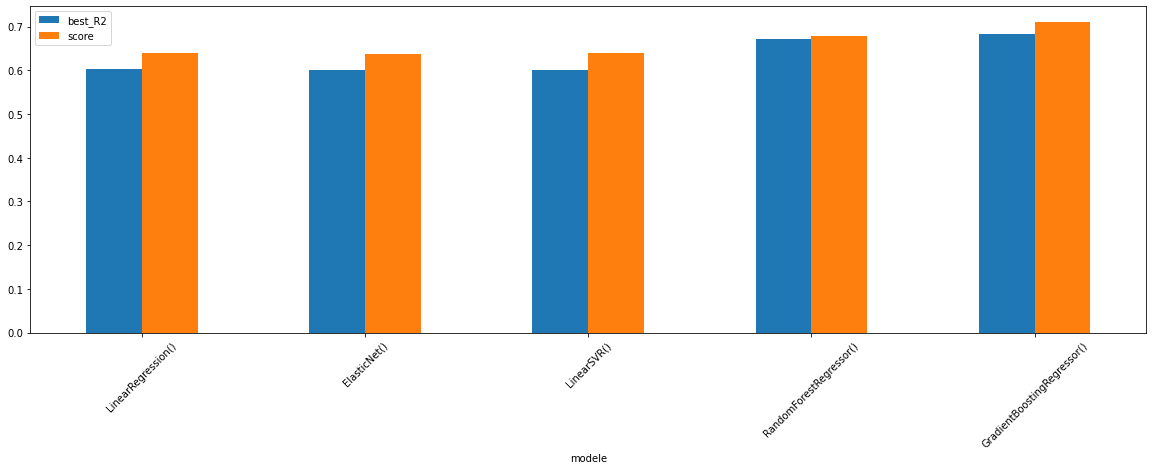

In [37]:
dfEnergyUse = dfEnergyUse[dfEnergyUse['best_R2']>0]
#visualiser la comparaison entre le coefficient de determination r2 sur le train-set (orange) et sur le test-set (bleu)  
dfEnergyUse.plot(kind='bar',x='modele', y=['best_R2','score'], stacked=False,rot=45,figsize=(20,6))


### b) Evaluation selon MAE  <a class="anchor" id="3.2.b"></a>  


<AxesSubplot:xlabel='modele'>

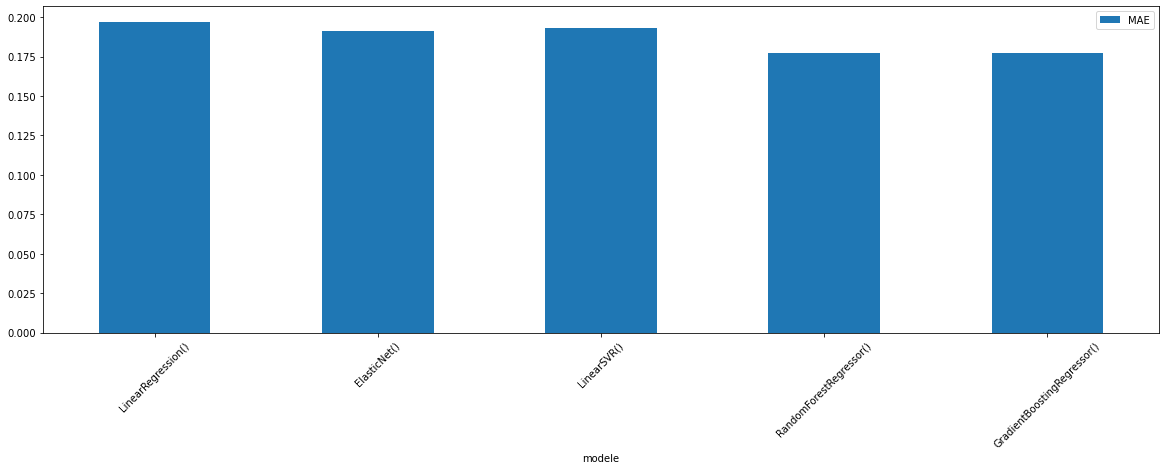

In [38]:
dfEnergyUse['MAE']=np.abs(dfEnergyUse['MAE'])
dfEnergyUse.plot(kind='bar',x='modele', y='MAE', stacked=False,rot=45,figsize=(20,6))

### c) Evaluation selon le temps d'entrainement  <a class="anchor" id="3.2.c"></a>  

<AxesSubplot:xlabel='modele'>

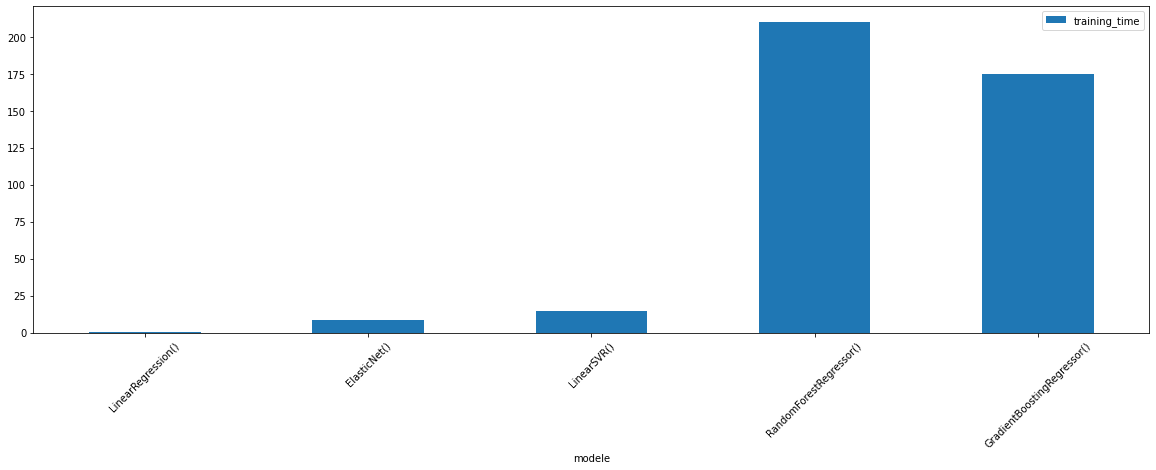

In [39]:
dfEnergyUse.plot(kind='bar',x='modele', y='training_time', rot=45,figsize=(20,6))

### d) Choix du modèle final  <a class="anchor" id="3.2.d"></a>  

Selon MAE et r2, les différents modèles sont plutôt proches. Point de vue temps d'entrainement, RandomForest et GradientBoosting sont très couteux. Nous allons donc choisir GradientBoosting parce qu'il a le meilleur score et il est moins couteux côté temps d'entainement par rpport à RandomForetRegressor. 

## 4- Feature Importance   <a class="anchor" id="4"></a>  
### 4.1. Par rapport au modèle RandomForestRegressor  <a class="anchor" id="4.1"></a>  
Feature selection pour le modele RandomForesRegressor pour la prédiction des émission CO2.

In [40]:

grid_RFR = GridSearchCV ( RandomForestRegressor(), 
                    param_rfr , 
                    cv= 5, 
                   )
#entrainer le modèle
grid_RFR.fit(x_train, y_train['TotalGHGEmissions'])   


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 15, 25, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

<BarContainer object of 14 artists>

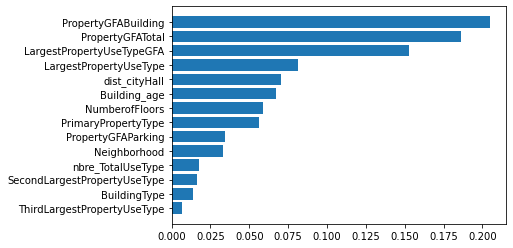

In [41]:
features= x_train.columns
f_i = list(zip(features,grid_RFR.best_estimator_.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.pyplot.barh([x[0] for x in f_i],[x[1] for x in f_i])


#### Interprétation
Nous constatons que la variable "PropertyGFABuilding" a la plus grande importance, par contre, ThirdLargestPropertyType a la plus faible importance dans la prédiction des émissions de CO2. 

### 4.2. Par rapport au modèle GradientBoostingRegressor <a class="anchor" id="4.2"></a>  
Feature selection pour le modele GradientBoostingRegressor pour la prédiction de la consommation d'énergie .

In [42]:
grid_GBR = GridSearchCV ( GradientBoostingRegressor(), 
                    param_XGB , 
                    cv= 5, 
                   )
#entrainer le modèle
grid_GBR.fit(x_train, y_train['SiteEnergyUse(kBtu)'])   

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4],
                         'n_estimators': [100, 500, 1000, 1500]})

<BarContainer object of 14 artists>

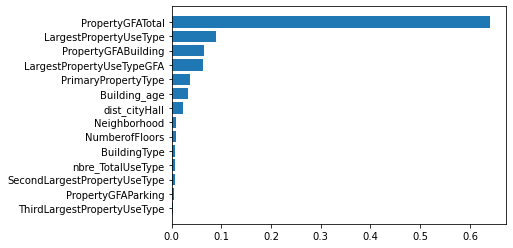

In [43]:
f_i = list(zip(features,grid_GBR.best_estimator_.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.pyplot.barh([x[0] for x in f_i],[x[1] for x in f_i])


#### Interprétation  

- Nous constatons que la variable "PropertyGFATotal" a la plus grande importance qui est très élevé par rapport aux autres features.   
- Par contre, ThirdLargestPropertyType n'a quasiment  plud d'importance.   
- Les autre features (Neighborhood, NumberofFloors, BuildingType, SecondLargestPropertyType, nbre_TotalUseType et PropertyGFAParking, ont presque la même faible importance. 

## 5. Mesurer l'effet de Energy Star Score  <a class="anchor" id="5"></a>  

Le score ENERGY STAR fournit un aperçu complet de la performance énergétique d'un bâtiment, en tenant compte des actifs physiques, des opérations et du comportement des occupants du bâtiment. Il est exprimé sur une échelle de 1 à 100 facile à comprendre : plus le score est élevé, meilleure est la performance énergétique du bâtiment.

Nous allons donc évaluer si ce score à un impact significatif sur les performances de notre modélisation.
Plus précisément, nous allons tester si l'effet d'Energy Star Score pour la prédiction de l'émission de CO2. 

In [44]:
# sélectionner uniquement les lignes où ENERGYSTARScore est non nul
dataset = dataset[dataset['ENERGYSTARScore'].notnull()]
        

In [45]:
#rajouter la variable ENERGYSTARScore à la liste des variables à entrainer
vars_to_train.append('ENERGYSTARScore')
vars_to_train

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'nbre_TotalUseType',
 'Building_age',
 'dist_cityHall',
 'ENERGYSTARScore']

In [46]:
new_X= dataset[vars_to_train]
Y = dataset[vars_to_predict]
x_train,x_test,y_train,y_test = train_test_split(new_X , Y , train_size=0.8, random_state=10)

In [47]:
new_X.shape

(1053, 15)

In [48]:
Y.shape

(1053, 2)

### RandomForestRegressor pour la prédiction des émissions de CO2 

In [49]:
#Rappel des meilleurs paramètres de RandomForestRegressor 
best_RFReg_param = dfTotalGHGEmissions.iloc[3]['best_params']
best_RFReg_param

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [50]:
best_RFReg_param = {'bootstrap': [True],
 'max_depth': [15],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [2]}

In [51]:
#definir la fonction qui lance le gridsearchcv avec les best hypermarapètres
grid = GridSearchCV ( RandomForestRegressor(), 
                    best_RFReg_param, 
                    cv= 5, 
                    scoring= scoring,
                    refit= 'r2',
                    return_train_score = True
                   )


In [52]:
grid.fit(x_train, y_train['TotalGHGEmissions'])        

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [15],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2]},
             refit='r2', return_train_score=True,
             scoring={'MAE': 'neg_median_absolute_error', 'r2': 'r2'})

In [53]:
#pour évaluer , nous allons juste regarder le score de trainset et testset
R2 = round (grid.best_score_ , 3)
score = grid.best_estimator_.score(x_test, y_test['TotalGHGEmissions'])

print('\nR2: ',R2, '\nscore: ',score)


R2:  0.572 
score:  0.592685398113816


### Interprétation :  
L'influence de ENERGY Star Score sur la prédiction de émission de CO2:  
  - sans ENERGY Star Score: 
                           R2 = 0.485
                           score = 0.532  
  - avec ENERGY Star Score: 
                           R2= 0.561
                           score= 0.584  
Nous constatons que ENERGY Star Score a amélioré le coefficien de détermination sur le trainSet (0.485 --> 0.561).  
Une légère amélioration est aussi observée pour  le TestSet (0.532 --> 0.584).  

### Conclusion :    

ENERGY Star Score améliore légèrement la prédiction des émissions de CO2. Vu son coût assez élevé, je ne trouve pas que cette légère montée de performance vaut la peine de l'utiliser. Donc il vaut mieux ne pas l'employer. 

### Recherche des autres meilleurs hyperparamètres avec ENERGY STAR Score

In [54]:
grid = GridSearchCV ( RandomForestRegressor(), 
                    param_rfr, 
                    cv= 5, 
                    scoring= scoring,
                    refit= 'r2',
                    return_train_score = True
                   )
start_time = time.time()
       
#entrainer la grid qui contient plusieurs estimateurs
grid.fit(x_train, y_train['TotalGHGEmissions'])
        
training_time = time.time() - start_time
df = pd.DataFrame(grid.cv_results_)
    
#récupérer les valeurs des métriques d'évaluation
MAE = round(df['mean_test_MAE'][df['rank_test_MAE'] == 1].values[0] , 3)
R2 = round (grid.best_score_ , 3)
bestParams = grid.best_params_
score = grid.best_estimator_.score(x_test, y_test['TotalGHGEmissions'])    
#AFFICHER les résultats 
print ('best_params :', bestParams,
       '\nbest_R2: ', R2 , 
       '\nMAE :',MAE,
       '\nscore : ', score,
        '\ntraining_time :', training_time)
          



best_params : {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5} 
best_R2:  0.574 
MAE : -0.266 
best_estimator:  RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5) 
score :  0.5934908160835111 
training_time : 170.51989364624023


#### Concusion:  
Les meilleurs hyperparamètres   
 - En entrainant ENERGY STAR Score sont:  
   {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}   
 - Sans entrainer ENERGY STAR Score sont:  
   {'bootstrap': False,'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2,'min_samples_split': 5}
  
--> GridSearchCV a pu trouver d'autres meilleurs hyperparamètres.  
 
Relancer le GridSearchCV avec ENERGY STAR Score a donné :  
  - un coefficient de détermination légèrement plus élevé que celui avec les hyperparamètres déjà préfixés (0.561  --> 0.574)  
  - un score légèrement plus élevé que celui avec les hyperparamètres déjà préfixés (0.584 --> 0.593) 
 